In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

plt.style.use(['science', 'nature'])

In [2]:
df_cmt = pd.read_excel("./Data/Fig1_d_PubMed_comted_GHE_count.xlsx")
df_cmt

,Year,Level 2,Comted_L2_count
0,2020,Respiratory Infectious,11790
1,2019,Malignant neoplasms,5389
2,2020,Malignant neoplasms,5297
3,2018,Malignant neoplasms,5232
4,2013,Malignant neoplasms,5201
...,...,...,...
655,1994,Nutritional deficiencies,6
656,2022,"Endocrine, blood, immune disorders",4
657,2021,Sudden infant death syndrome,4
658,2022,Oral conditions,2


In [3]:
df_all = pd.read_csv("./Data/Fig1_d_GHE_Disease_Flat.csv")
df_all = df_all.groupby(["Level 2", "Year"], as_index=False)["Count"].sum()
df_all

,Level 2,Year,Count
0,Cardiovascular diseases,1944,1
1,Cardiovascular diseases,1945,204
2,Cardiovascular diseases,1946,728
3,Cardiovascular diseases,1947,864
4,Cardiovascular diseases,1948,1068
...,...,...,...
1597,Sudden infant death syndrome,2019,114
1598,Sudden infant death syndrome,2020,124
1599,Sudden infant death syndrome,2021,103
1600,Sudden infant death syndrome,2022,97


In [4]:
merged_df = df_cmt.merge(df_all, on=["Level 2", "Year"], how="left")
merged_df = merged_df[merged_df["Year"] <= 2020]


In [5]:
merged_df["Ratio"] = merged_df["Comted_L2_count"] / merged_df["Count"]
merged_df

,Year,Level 2,Comted_L2_count,Count,Ratio
0,2020,Respiratory Infectious,11790,136352,0.086467
1,2019,Malignant neoplasms,5389,133023,0.040512
2,2020,Malignant neoplasms,5297,142165,0.037260
3,2018,Malignant neoplasms,5232,125567,0.041667
4,2013,Malignant neoplasms,5201,118989,0.043710
...,...,...,...,...,...
651,2019,Sudden infant death syndrome,7,114,0.061404
652,2017,Sudden infant death syndrome,7,139,0.050360
653,1991,Nutritional deficiencies,7,311,0.022508
654,2020,Sudden infant death syndrome,6,124,0.048387


In [6]:
# Base line
df = pd.read_excel("./Data/Fig1_a.xlsx", sheet_name="Fig1.b_PubMed_timeline")
df.drop(0, inplace=True)
df = df[df["Year"] <= 2020]
x = df["Year"]
y = df["Comment in_Count"]
y_rate = df["Com_percentage"]

In [7]:
categories = merged_df["Level 2"].unique()
categories

array(['Respiratory Infectious ', 'Malignant neoplasms',
       'Cardiovascular diseases', 'Genitourinary diseases',
       'Infectious and parasitic diseases',
       'Mental and substance use disorders', 'Digestive diseases',
       'Diabetes mellitus', 'Skin diseases', 'Maternal conditions',
       'Respiratory diseases', 'Neurological conditions',
       'Musculoskeletal diseases', 'Congenital anomalies',
       'Sense organ diseases', 'Neonatal conditions',
       'Nutritional deficiencies', 'Oral conditions',
       'Endocrine, blood, immune disorders',
       'Sudden infant death syndrome'], dtype=object)

In [8]:
# 使用rolling函数计算三年平滑值
window_size = 3
smoothed = merged_df.groupby('Level 2')['Ratio'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# 将平滑后的数据添加到原始DataFrame
merged_df['smoothed_ratio'] = smoothed

In [9]:
order = merged_df.groupby(["Level 2"])["smoothed_ratio"].mean().sort_values(ascending=False)
order

Level 2
Sudden infant death syndrome          0.083860
Cardiovascular diseases               0.069851
Neonatal conditions                   0.060945
Respiratory Infectious                0.055472
Sense organ diseases                  0.055299
Digestive diseases                    0.052448
Maternal conditions                   0.046069
Nutritional deficiencies              0.045997
Musculoskeletal diseases              0.044940
Congenital anomalies                  0.044492
Diabetes mellitus                     0.043842
Infectious and parasitic diseases     0.041989
Mental and substance use disorders    0.039197
Respiratory diseases                  0.039166
Malignant neoplasms                   0.038269
Genitourinary diseases                0.024310
Neurological conditions               0.020134
Skin diseases                         0.019824
Endocrine, blood, immune disorders    0.019145
Oral conditions                       0.012843
Name: smoothed_ratio, dtype: float64

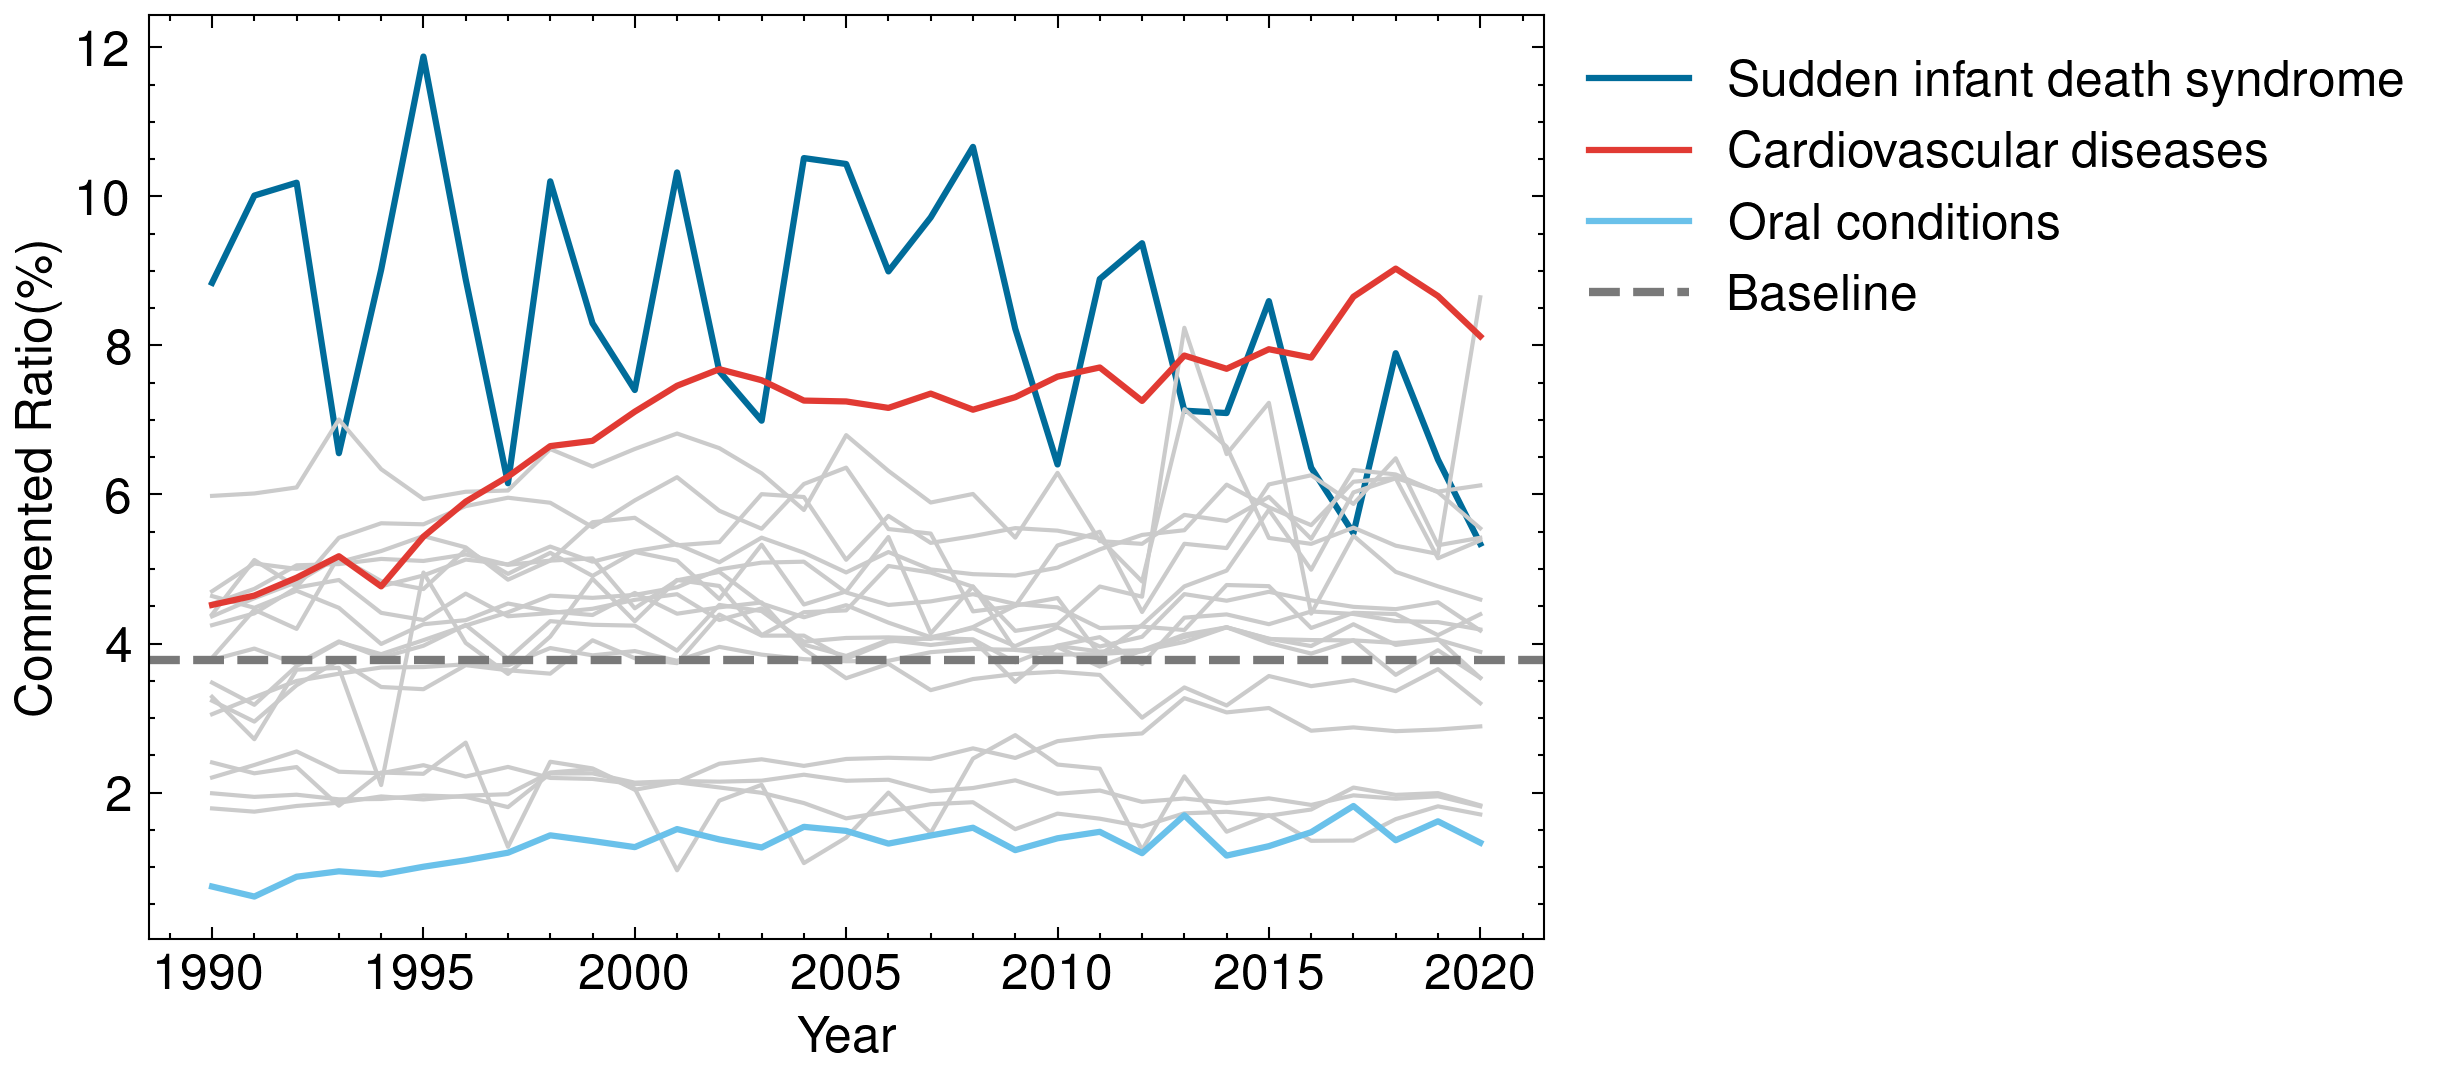

In [14]:
plt.figure(dpi=300, figsize=(6,4))
for c in order.index:
    if c == "Sudden infant death syndrome":
        sns.lineplot(data=merged_df[merged_df["Level 2"] == c], x="Year", y="smoothed_ratio", color="#006c9a", lw=1.5, label=c)
    elif c =="Cardiovascular diseases":
        sns.lineplot(data=merged_df[merged_df["Level 2"] == c], x="Year", y="smoothed_ratio", zorder=99, color="#e13a33", lw=1.5, label=c)
    elif c == "Oral conditions":
        sns.lineplot(data=merged_df[merged_df["Level 2"] == c], x="Year", y="smoothed_ratio", zorder=99, color="#6ac1ea", lw=1.5, label=c)
    else:
        sns.lineplot(data=merged_df[merged_df["Level 2"] == c], x="Year", y="smoothed_ratio", color="#cbcbcb")
# Base line
# sns.lineplot(x=x, y=y_rate, color="#797979", lw=2, ls="--", label="Baseline")
plt.axhline(y=0.0378, color="#797979", lw=2, ls="--", label="Baseline")

plt.ylabel("Commented Ratio(\%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))
ax.tick_params("both", labelsize=12)

def percent_formatter(x, pos):
    return f'{100 * x:.0f}%'

formatter = ticker.FuncFormatter(percent_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.show()

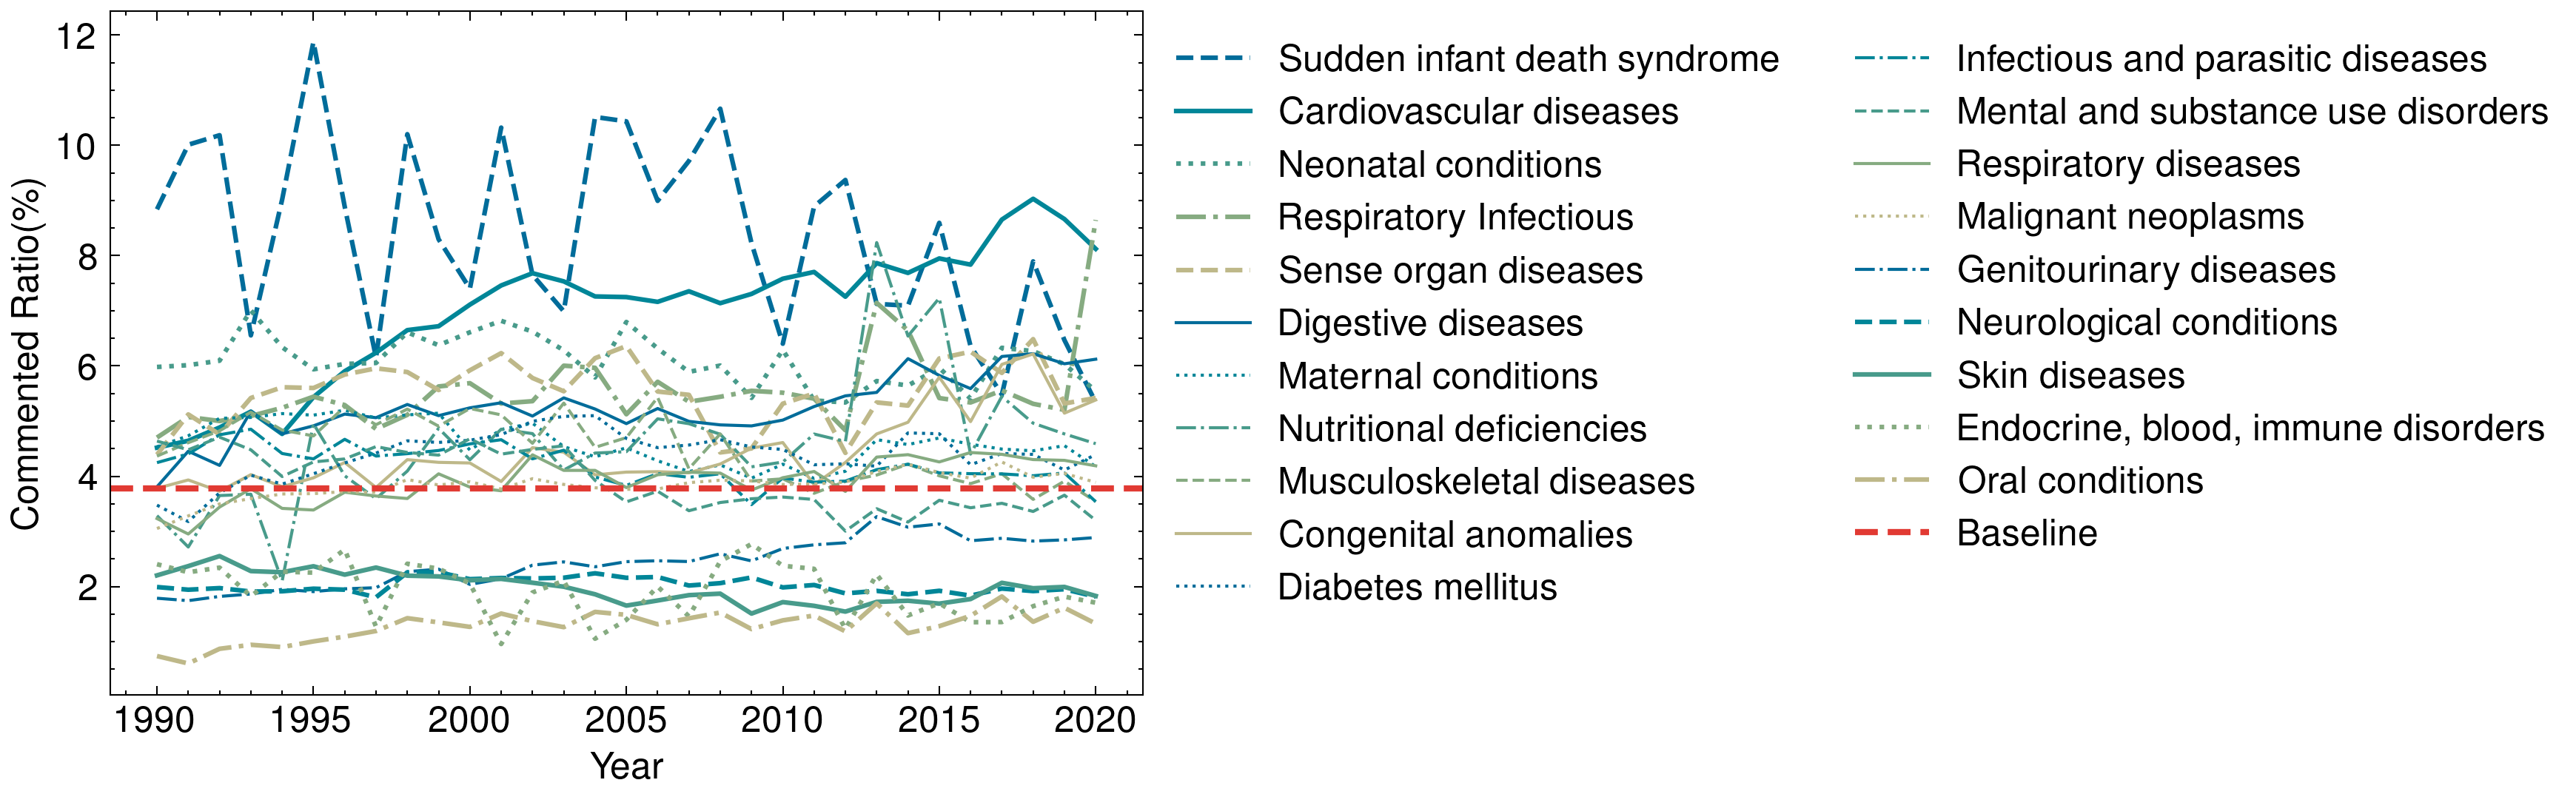

In [16]:
# 定义颜色列表和标记样式列表
colors = ['#006c9a', '#008698', '#489b8b', '#86ab81', '#beb889']
line_styles = ['--', '-', ':', '-.']

plt.figure(dpi=300, figsize=(6,4))

for i, c in enumerate(order.index):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    if i <=15 and i >= 5:
        lw = 1
    else:
        lw = 1.5
    sns.lineplot(data=merged_df[merged_df["Level 2"] == c], x="Year", y="smoothed_ratio", color=color, lw=lw, ls=line_style,label=c)

# Base line
# sns.lineplot(x=x, y=y_rate, color="#e13a33", lw=2, ls="--", label="Baseline")
plt.axhline(y=0.0378, color="#e13a33", lw=2, ls="--", label="Baseline")

plt.ylabel("Commented Ratio(\%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))
ax.tick_params("both", labelsize=12)

formatter = ticker.FuncFormatter(percent_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.legend(fontsize=12, bbox_to_anchor=(1,1), ncol=2)
plt.show()